## Parameter recovery summary

We were able to simulate data, estimate parameters using BHM and MLE. No we want to make some summary plots to evaluate each method.

In [40]:
# Built-in/Generic Imports
import os,sys
import glob
import math

# Libs
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_rows = 999

In [41]:
bhm_fn = os.path.join('simul/parameter_estimate_bhm.csv')
bhm_df = pd.read_csv(bhm_fn,index_col=0)

for v in ['kappa','gamma']:
    for type in ['sing','agg']:
        bhm_df['{}_{}_mse'.format(v,type)] = (bhm_df['{}_bhm_{}'.format(v,type)]-bhm_df['{}_gt'.format(v)])**2
        bhm_df['{}_{}_nmse'.format(v,type)] = 100*(bhm_df['{}_bhm_{}'.format(v,type)]-bhm_df['{}_gt'.format(v)])**2 / (bhm_df['{}_bhm_{}'.format(v,type)])**2
bhm_df


,kappa_gt,gamma_gt,kappa_bhm_sing,gamma_bhm_sing,kappa_bhm_agg,gamma_bhm_agg,kappa_sing_mse,kappa_sing_nmse,kappa_agg_mse,kappa_agg_nmse,gamma_sing_mse,gamma_sing_nmse,gamma_agg_mse,gamma_agg_nmse
0,0.000010,0.5,0.001399,0.437808,0.001136,0.428097,1.928345e-06,9.857516e+01,1.268778e-06,98.247800,0.003868,2.017918,0.005170,2.821002
1,0.000010,1.0,0.000078,1.024450,0.000061,1.028331,4.573344e-09,7.589511e+01,2.608124e-09,69.931899,0.000598,0.056960,0.000803,0.075904
2,0.000010,1.5,0.000242,5.884628,0.000232,5.851508,5.404858e-08,9.192209e+01,4.922519e-08,91.560387,19.224967,55.517193,18.935619,55.302396
3,0.000010,2.0,0.000190,2.135742,0.000161,2.157214,3.230395e-08,8.973666e+01,2.285660e-08,87.976728,0.018426,0.403954,0.024716,0.531124
4,0.000010,2.5,0.000043,10.133943,0.000053,7.188675,1.106667e-09,5.911685e+01,1.880931e-09,66.036388,58.277090,56.746740,21.983669,42.540494
5,0.000010,3.0,0.000056,2.592760,0.000049,2.615357,2.131770e-09,6.756388e+01,1.558528e-09,63.662971,0.165844,2.467038,0.147950,2.162982
6,0.000010,3.5,0.000068,2.662150,0.000061,2.689245,3.399858e-09,7.286413e+01,2.649892e-09,70.113460,0.701993,9.905311,0.657323,9.089042
7,0.000010,4.0,0.000071,2.660061,0.000060,2.685801,3.666448e-09,7.366085e+01,2.529094e-09,69.578168,1.795437,25.373886,1.727119,23.942791
8,0.000010,4.5,0.000043,10.065883,0.000053,7.184625,1.111809e-09,5.918017e+01,1.878295e-09,66.019033,30.979057,30.574855,7.207210,13.962365
9,0.000010,5.0,0.000044,10.114847,0.000054,7.185119,1.169873e-09,5.987247e+01,1.897421e-09,66.144292,26.161658,25.570937,4.774744,9.248731


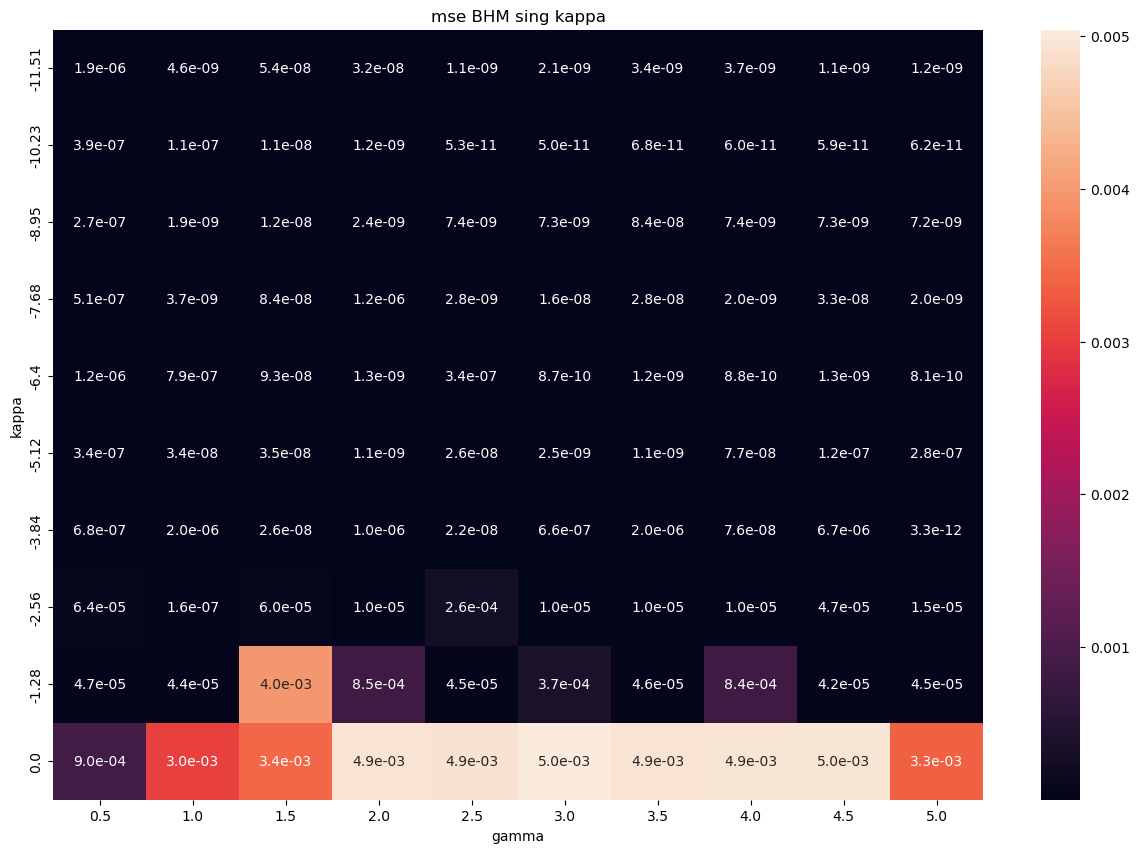

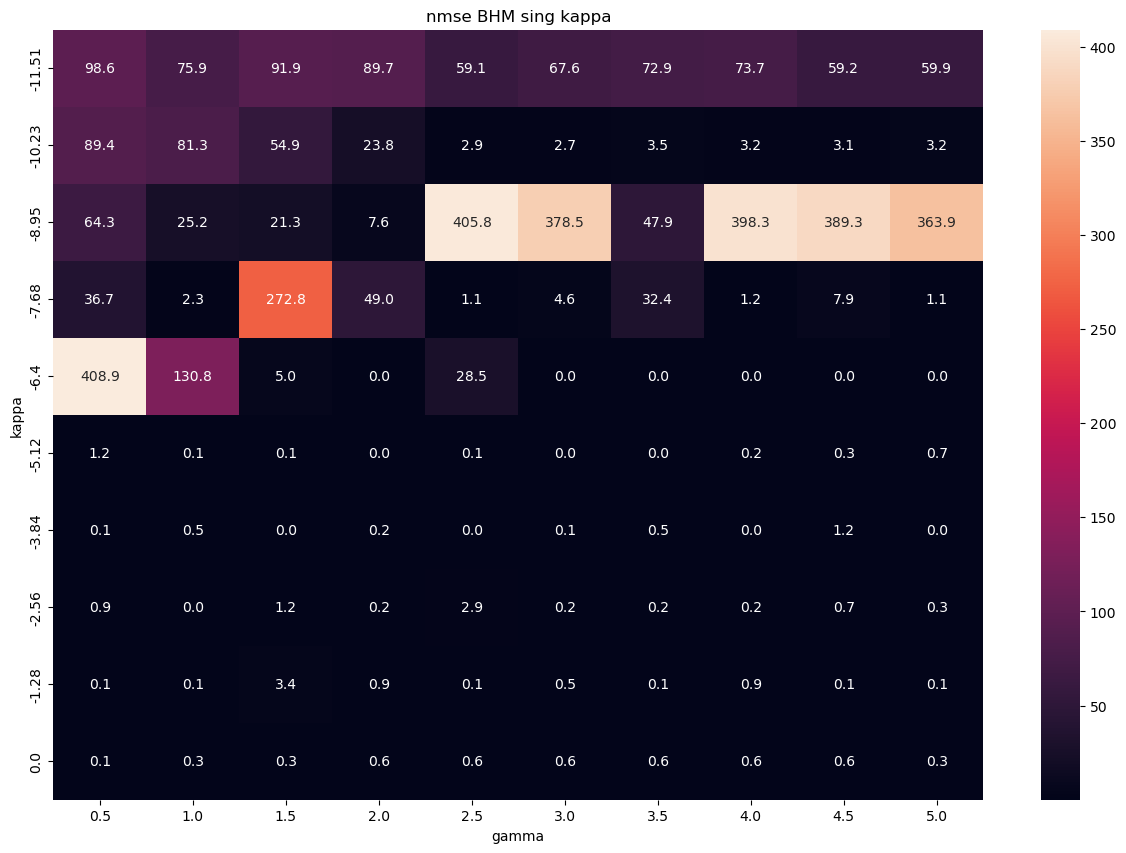

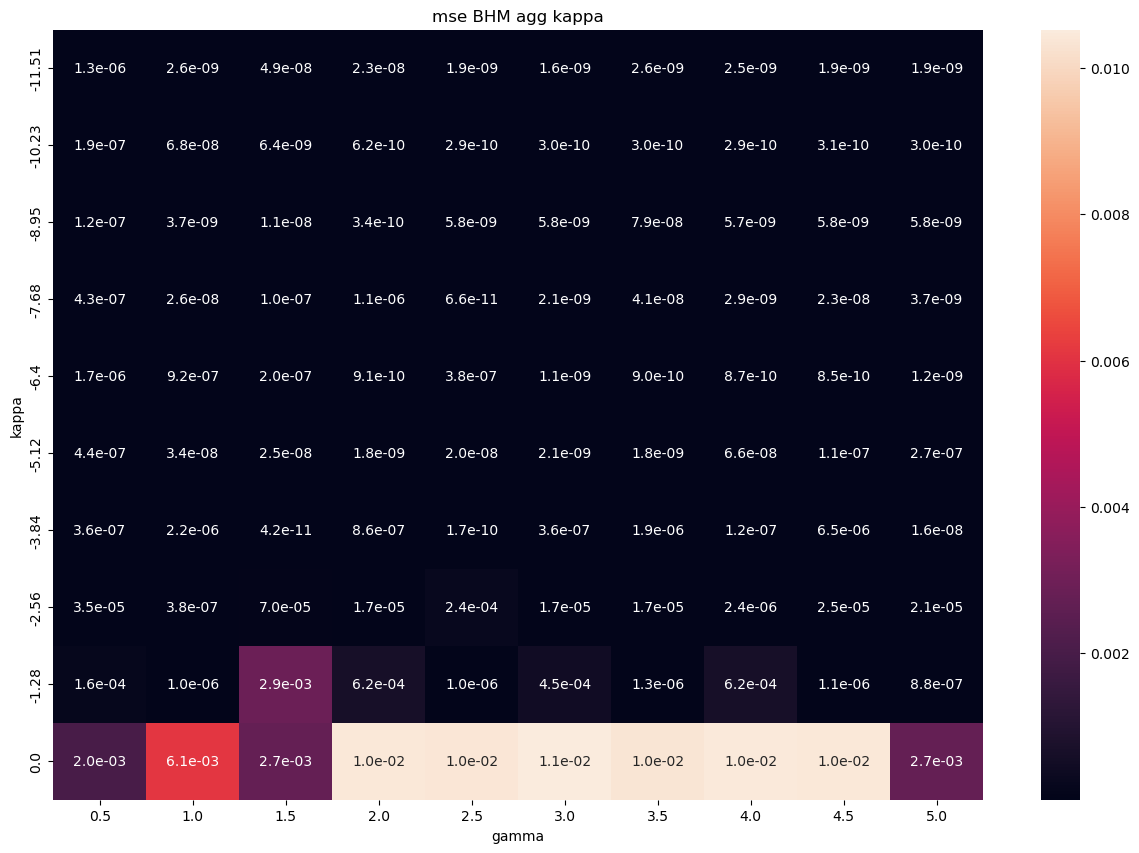

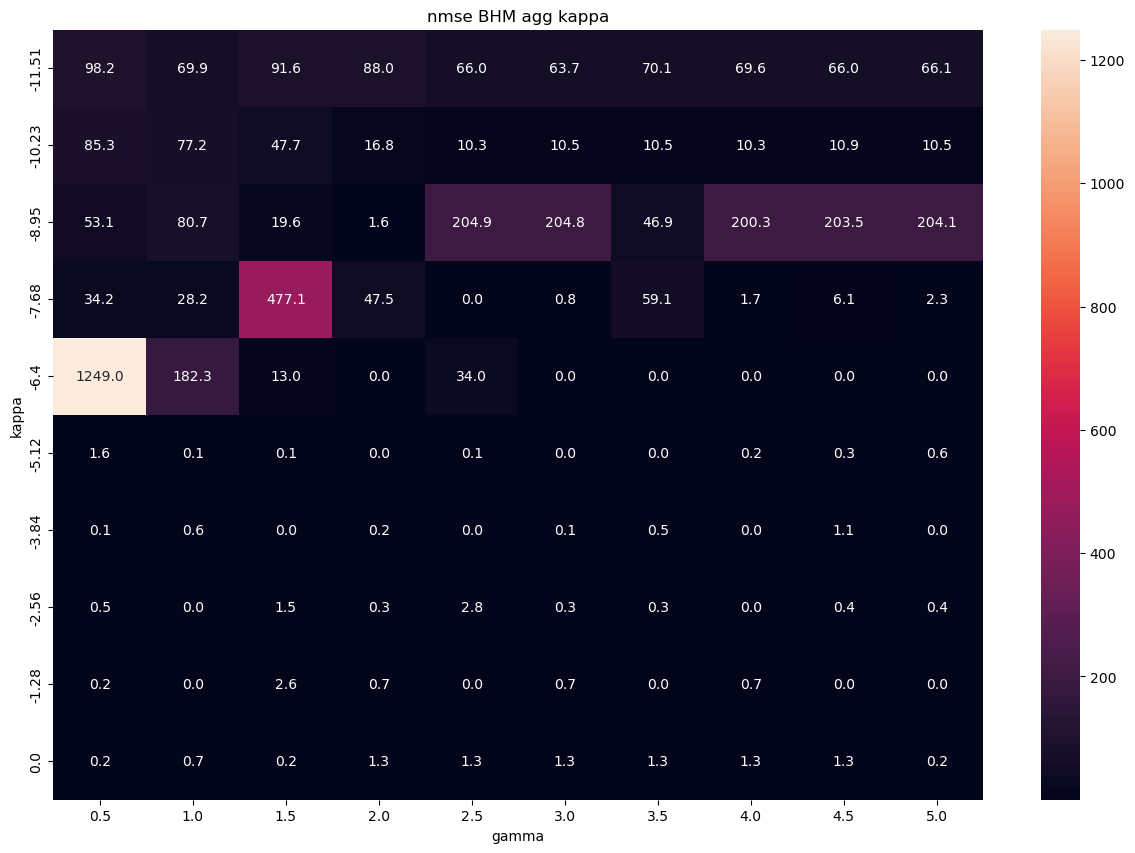

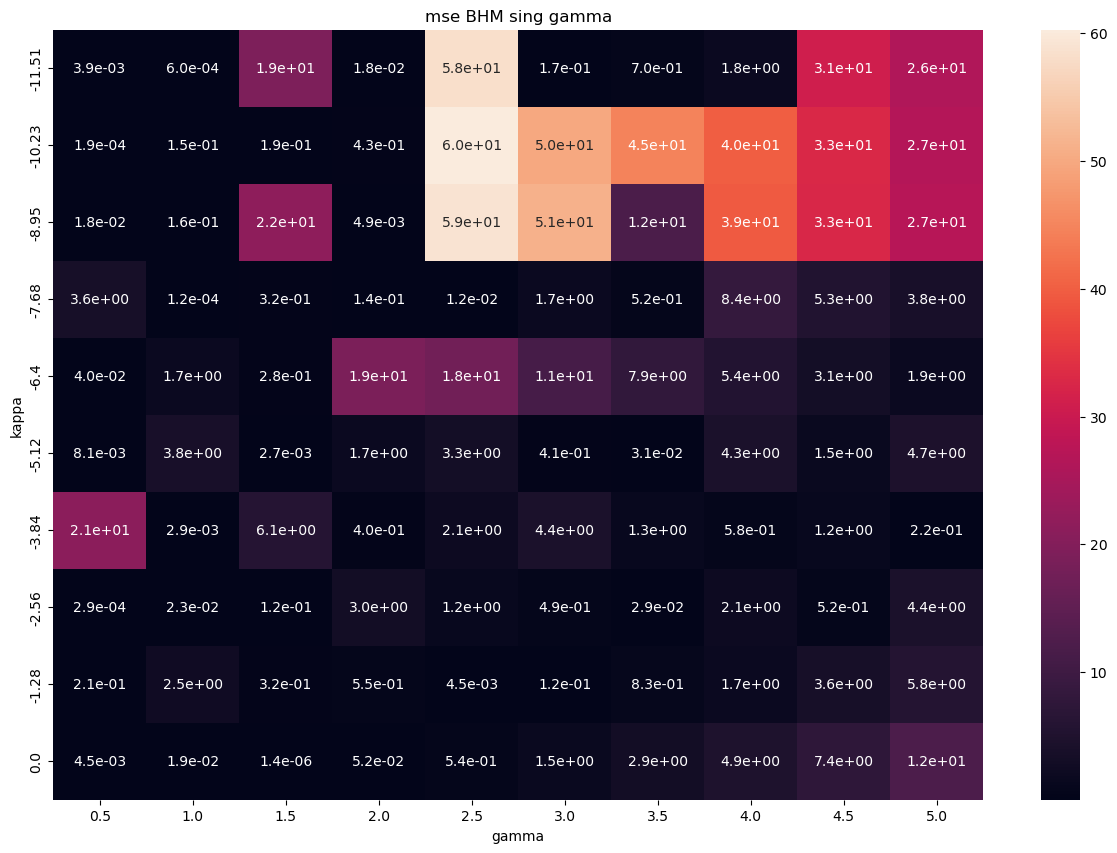

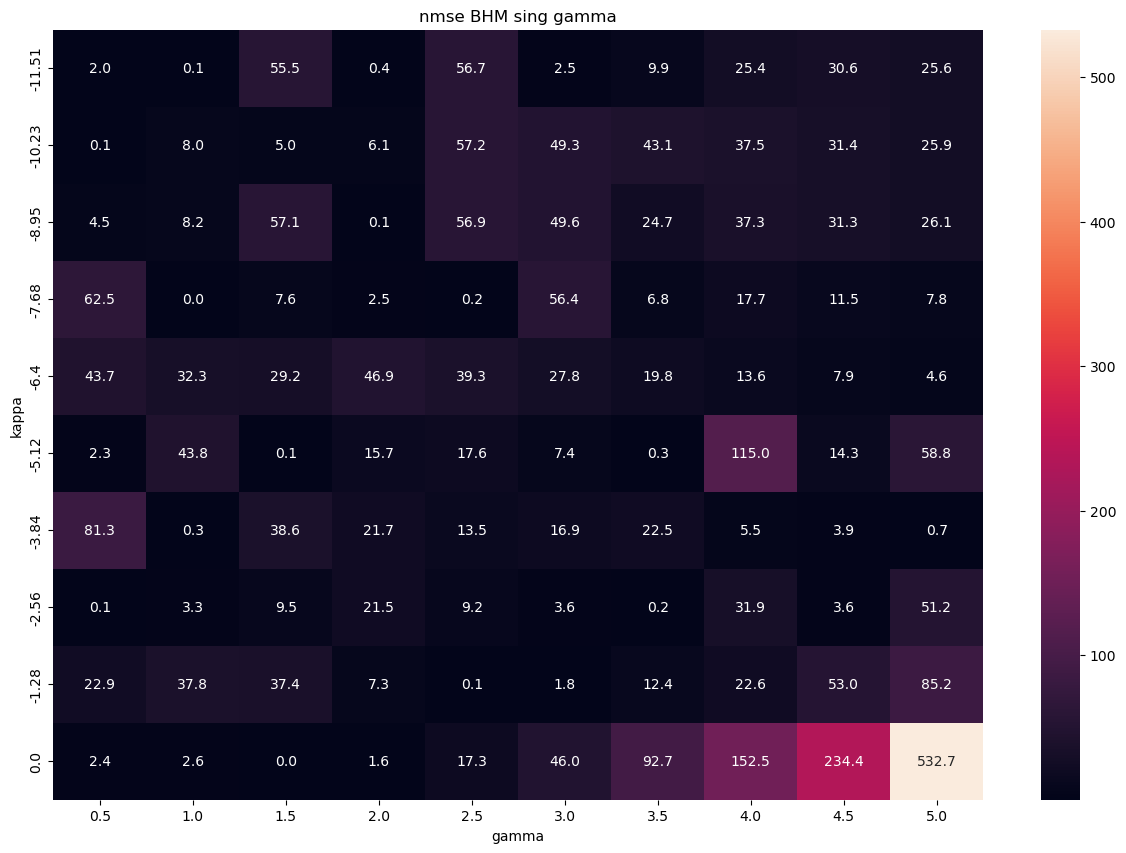

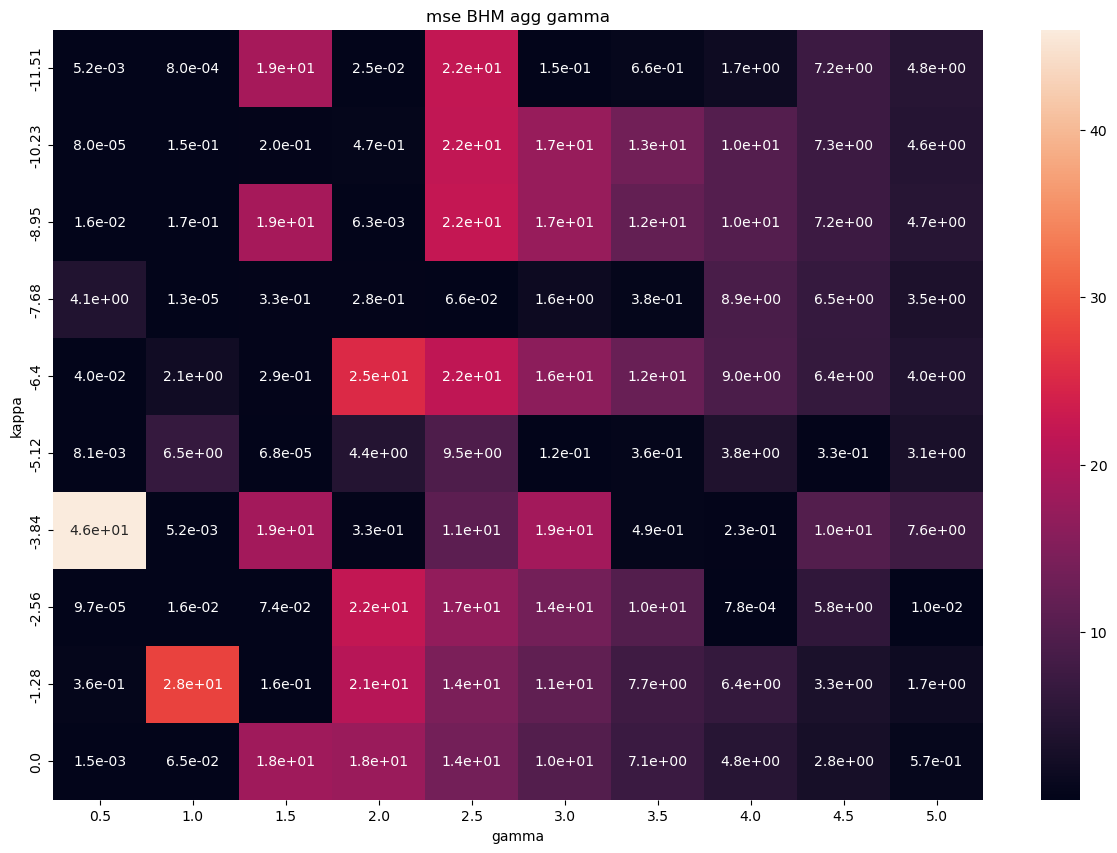

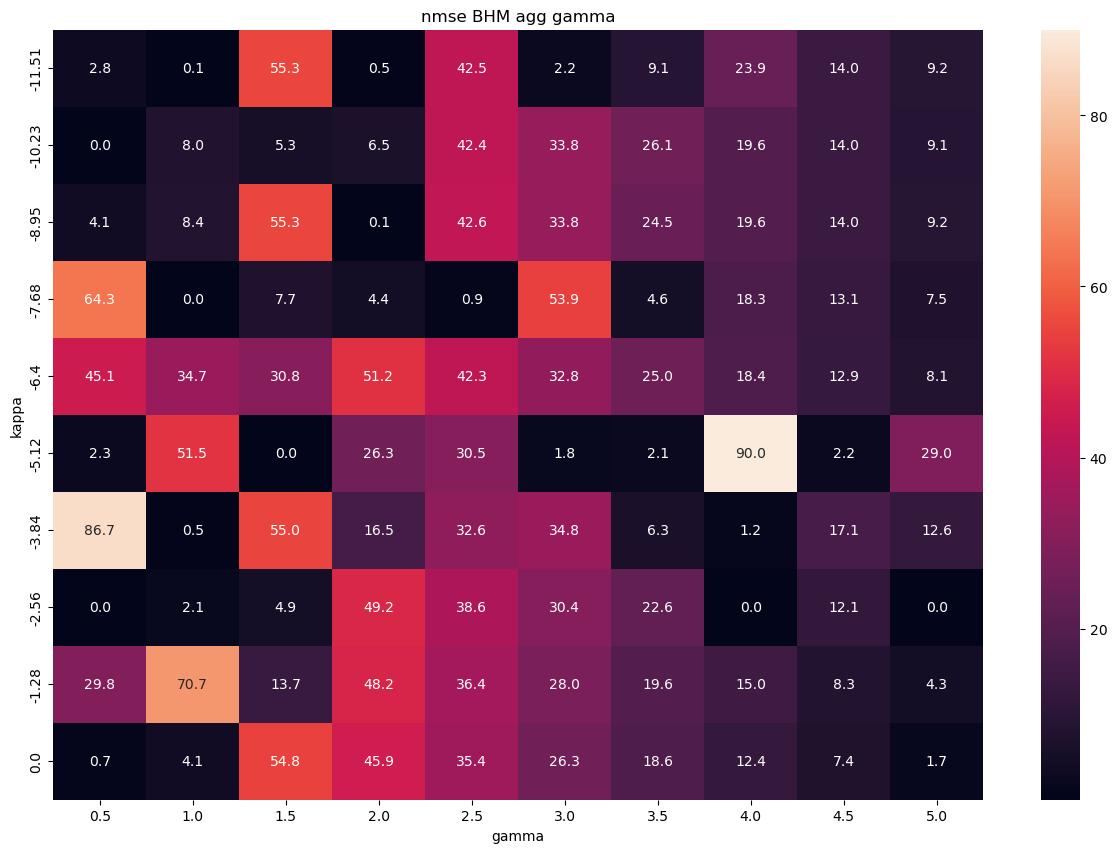

In [49]:
for v in ['kappa','gamma']:
    for type in ['sing','agg']:
        for err in ['mse','nmse']:
            mse = bhm_df['{}_{}_{}'.format(v,type,err)].values.reshape(10,10)
            index = np.round(np.log(bhm_df['kappa_gt'].unique()),2)
            columns = bhm_df['gamma_gt'].unique()
            mse_df = pd.DataFrame(mse,index=index,columns=columns)

            fig,ax = plt.subplots(figsize=(15,10))
            fmt = '.1e'
            if err == 'nmse':
                fmt = '.1f'
            s=sns.heatmap(mse_df,annot=True,fmt=fmt,ax=ax)
            s.set(xlabel='gamma', ylabel='kappa')
            ax.set_title('{} BHM {} {}'.format(err,type,v))